### ***Importing Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

### ***Loading The Dataset***

In [4]:
## creating database conn
conn = sqlite3.connect('inventory.db')

## fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,1128,SHAW ROSS INT L IMP LTD,1233,Jack Daniels No 7 Black,26.27,36.99,750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,BROWN-FORMAN CORP,3405,Tito's Handmade Vodka,23.19,28.99,750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,BROWN-FORMAN CORP,8068,Absolut 80 Proof,18.24,24.99,750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,ULTRA BEVERAGE COMPANY LLP,4261,Capt Morgan Spiced Rum,16.17,22.99,750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,PROXIMO SPIRITS INC.,3545,Ketel One Vodka,21.89,29.99,750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


### ***Exploratory Data Analysis***

* Previously, we examined the various tables in database to identify key variables, understand the realtionships, and determine which ones should be included in the final analysis.
  
* In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.  

In [6]:
 ## Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.460125e+02,634.497833,0.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


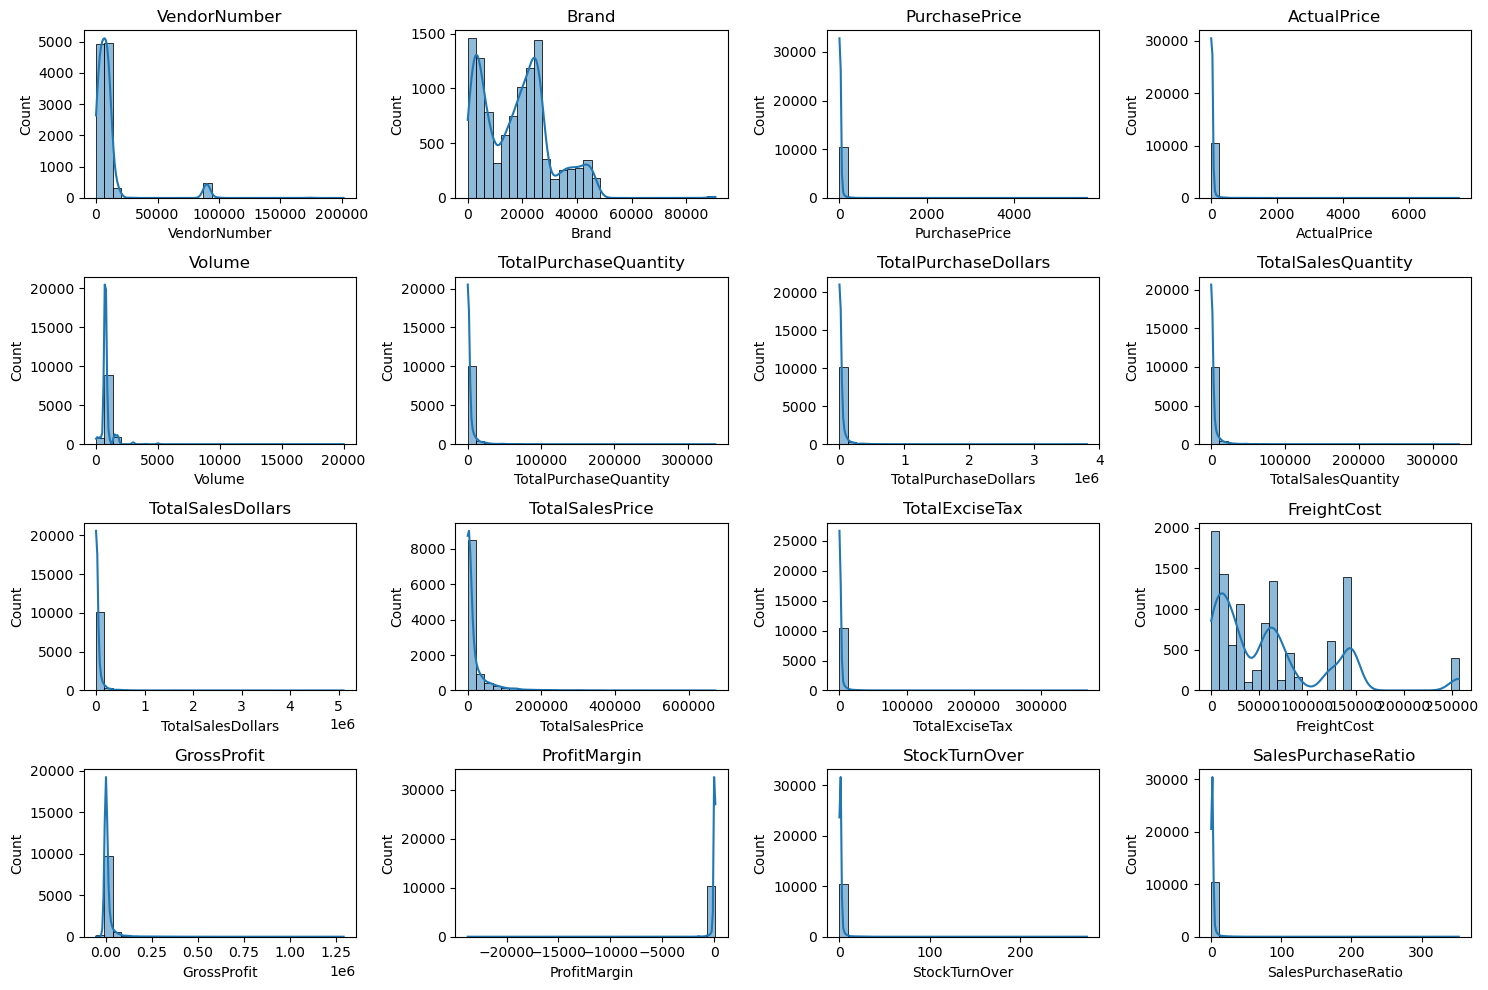

In [7]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+ 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

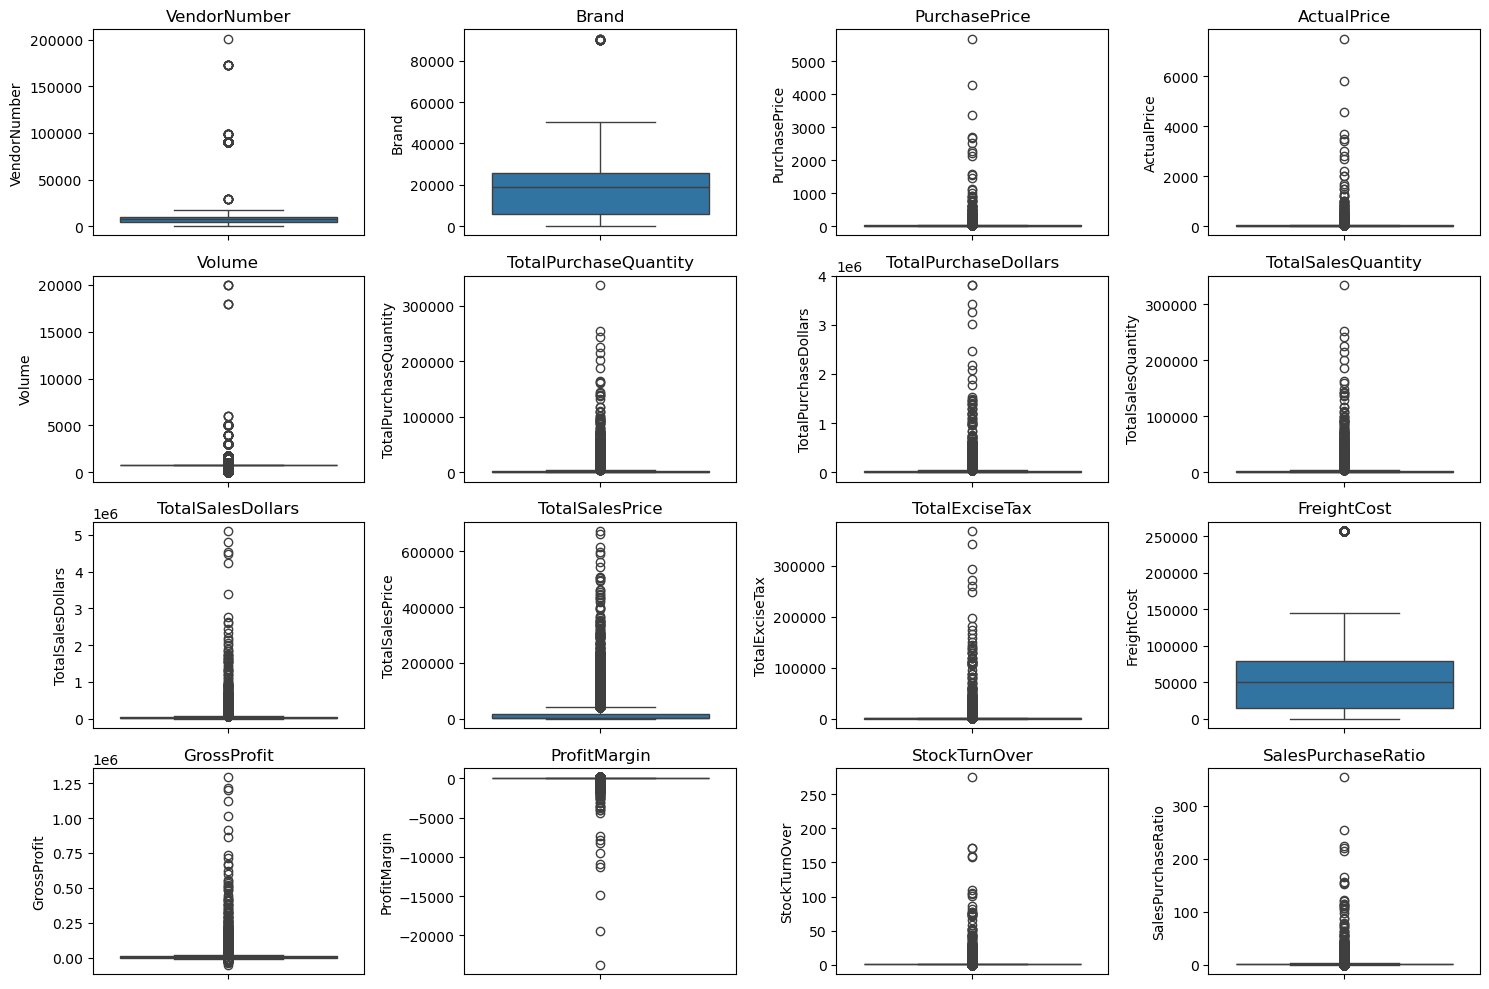

In [8]:
# Outlier Detection with Boxplots
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+ 1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### ***Summary Statistics Insights:***

#### ***Negative & Zero Values:***
* Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts
lower than the purchase price..
* Profit Margin: Has a minimum of -infinity which suggests cases where revenue is zero or even lower than costs.
* Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete
stock.)

#### ***Outliers Indicated by High Standard Deviations:***
* Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium
products.
* Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that
Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [10]:
## let's filter the data by removing inconsistencies
df = pd.read_sql_query("""
SELECT * FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0
""", conn)

In [11]:
df.shape

(8564, 18)

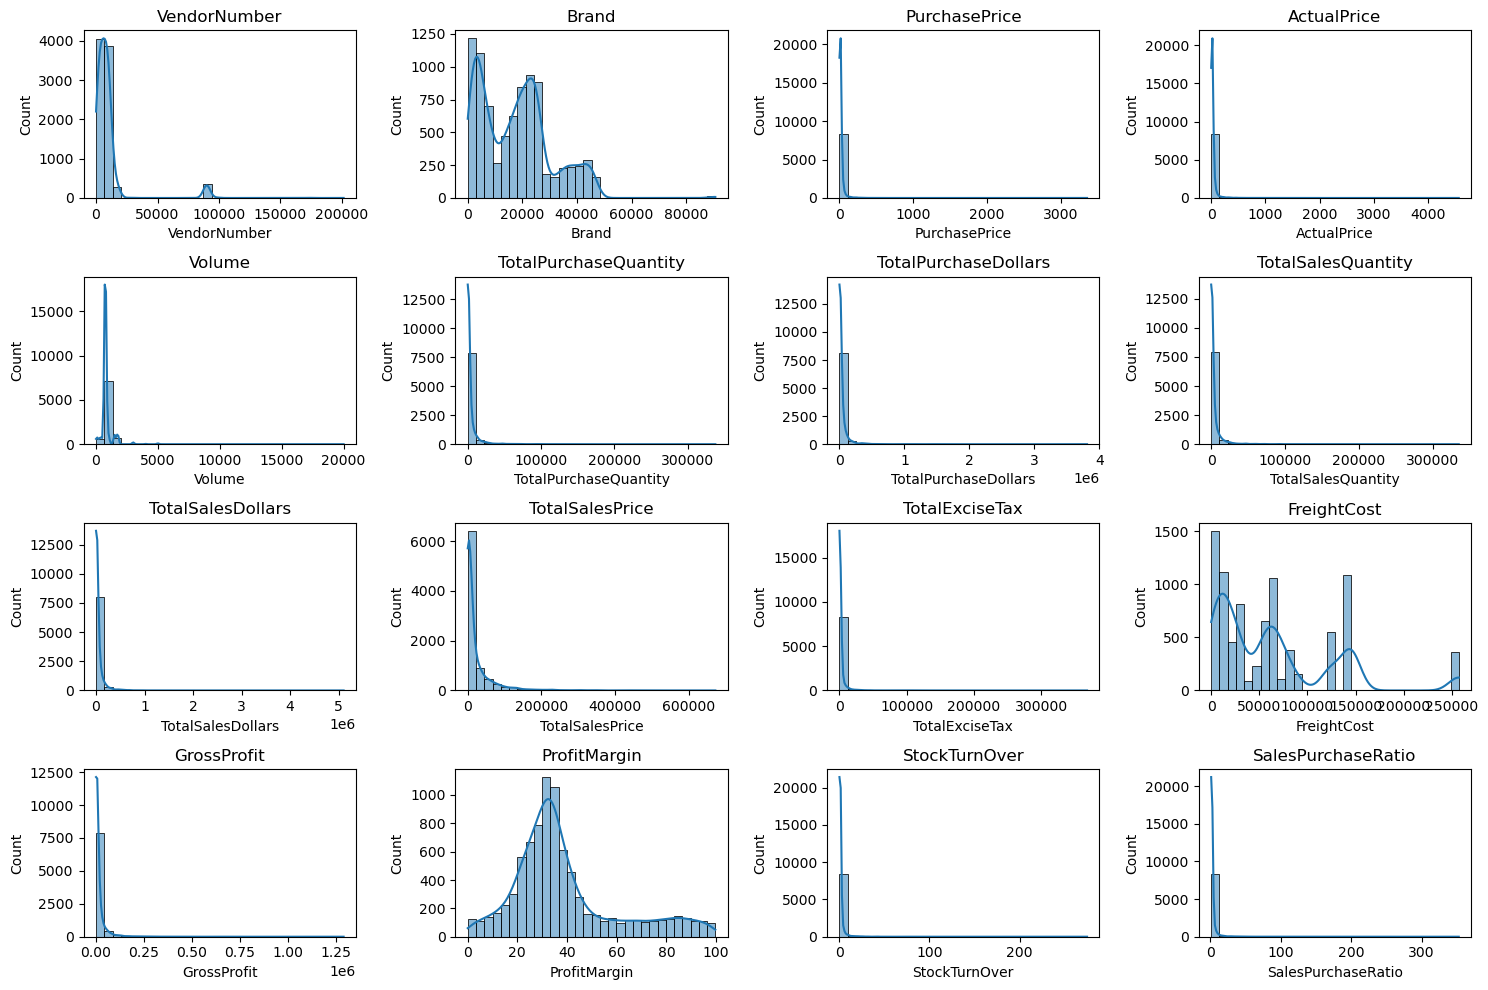

In [12]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+ 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

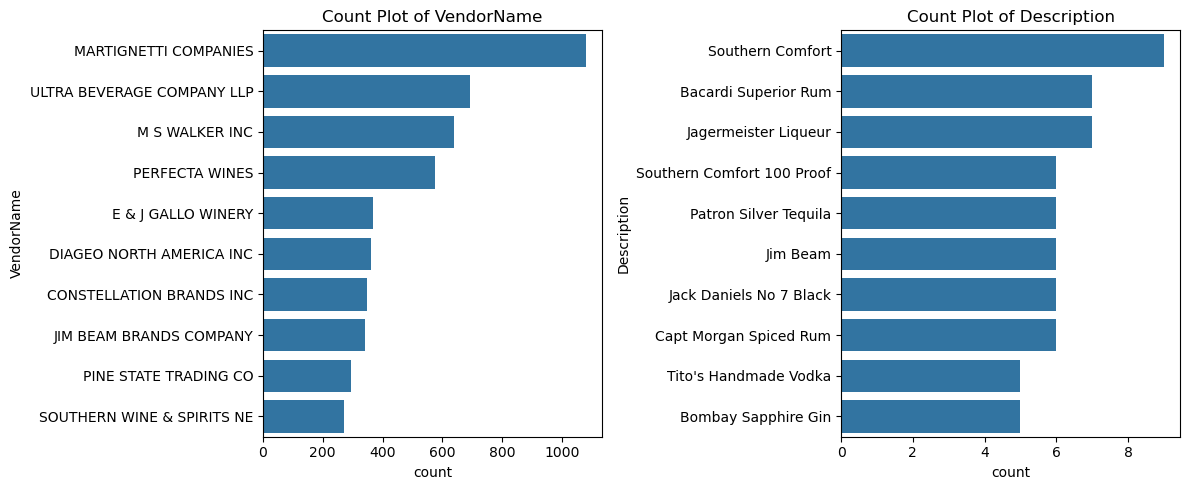

In [13]:
# count plot for categorial columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize = (12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) ## Top 10 Categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

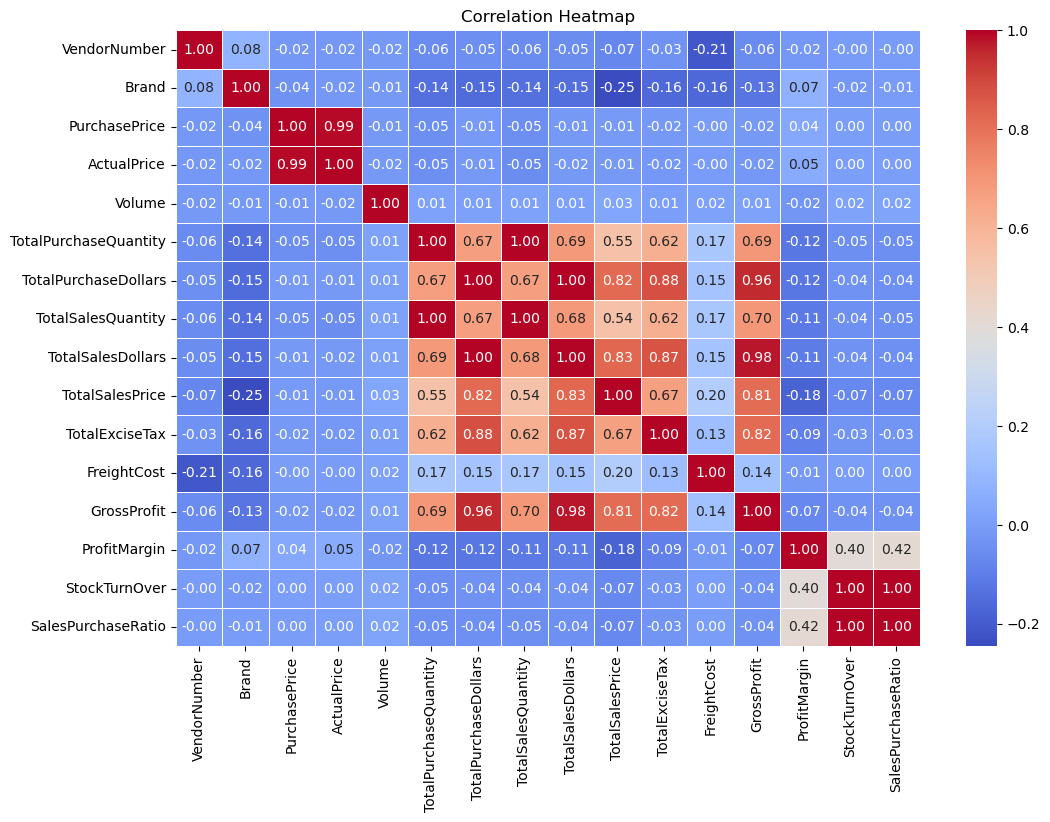

In [14]:
## Corelation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### ***Correlation Insights***

* PurchasePrice has weak correlations with TotalSaIesDoIIars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact
sales revenue or profit.
* Strong correlation between total and total sales quantity (0.999), confirming efficient inventory turnover.
* Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive
pricing pressures.
* StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily
result in higher profitability.

## ***Data Analysis***

 **Identify Brands that needs Promotional or Pricing Adjustments Which exhibit lower sales performance but higher profit margins.**

In [18]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [19]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [20]:
low_sales_threshold, high_margin_threshold

(560.299, 64.97017552750113)

In [21]:
# filter brands with low sales but high profit margins
target_brands = brand_performance[
(brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
(brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))


Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [22]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visualization

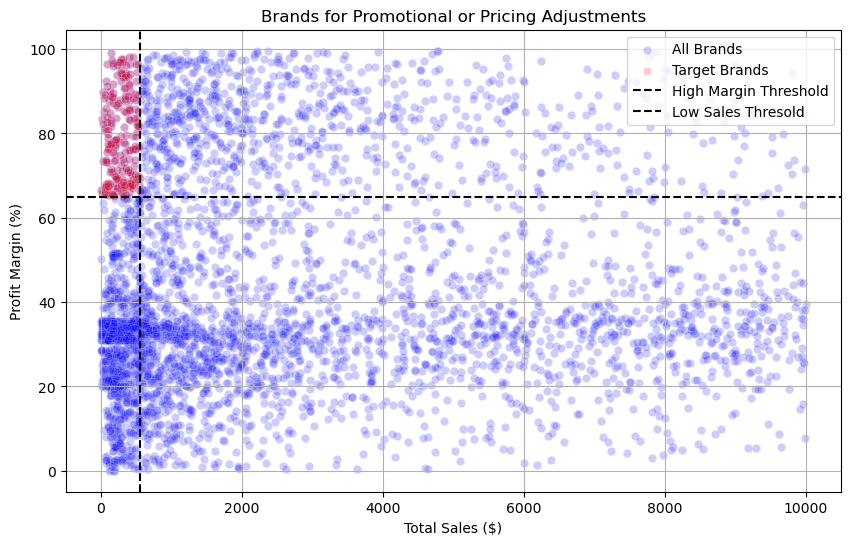

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands', alpha=0.2)

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Thresold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

 **Which vendors and brands demonstrate the highest sales performance?**

In [143]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/ 1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [26]:
# Top Vendors and brands by sales performance
top_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
JIM BEAM BRANDS COMPANY       50957626.38
DIAGEO NORTH AMERICA INC      43528976.55
ULTRA BEVERAGE COMPANY LLP    37167037.61
BROWN-FORMAN CORP             25588567.46
PROXIMO SPIRITS INC.          22314512.55
MARTIGNETTI COMPANIES         22025756.00
BACARDI USA INC               21035194.67
PERNOD RICARD USA             20774235.81
M S WALKER INC                15567912.29
CONSTELLATION BRANDS INC      15428897.28
Name: TotalSalesDollars, dtype: float64

In [27]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [28]:
top_brands.apply(lambda X : format_dollars(X))

Description
Jack Daniels No 7 Black    79.65M
Tito's Handmade Vodka      74.00M
Grey Goose Vodka           72.10M
Capt Morgan Spiced Rum     63.56M
Absolut 80 Proof           62.45M
Jameson Irish Whiskey      57.16M
Ketel One Vodka            50.70M
Baileys Irish Cream        41.50M
Kahlua                     36.05M
Tanqueray                  34.57M
Name: TotalSalesDollars, dtype: object

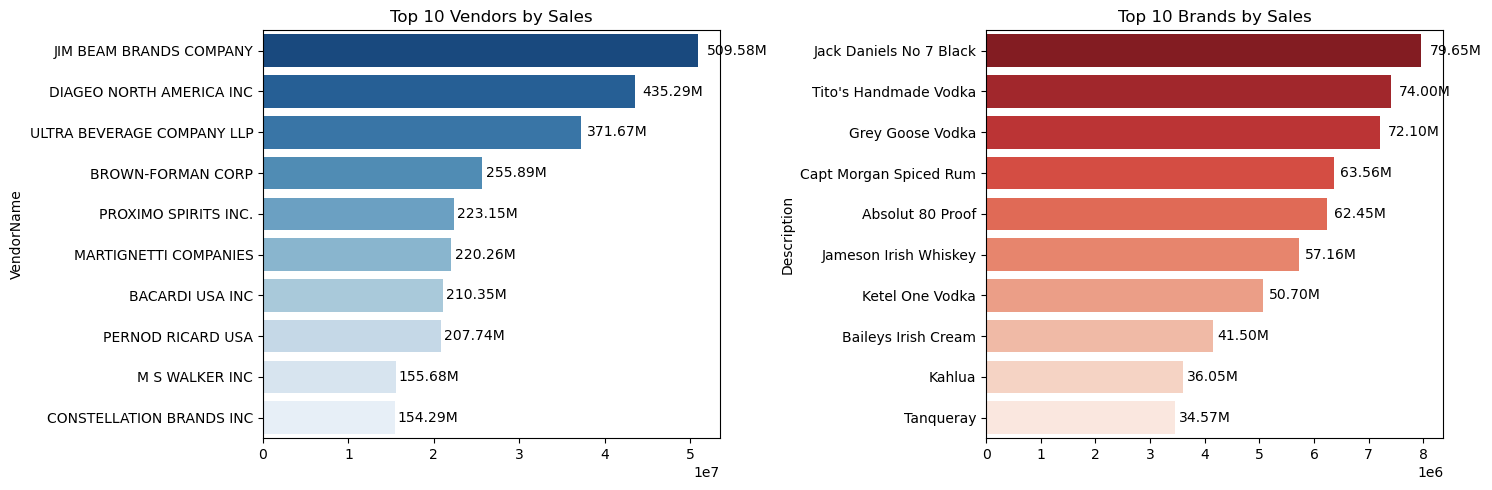

In [29]:
plt.figure(figsize=(15,5))

# plot for the top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+ (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black'
            )

# Plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
            bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center',fontsize=10, color='black'
            )
plt.tight_layout()
plt.show()

**Which Vendors contribute the most to total purchase dollars?**

In [66]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(121, 4)

In [82]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [84]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [86]:
# Display Top 10 Vendors safely
top_vendors = vendor_performance.head(10)

# Apply dollar formatting
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

# Display the formatted top vendors
top_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
47,JIM BEAM BRANDS COMPANY,362.51M,147.07M,509.58M,11.80
26,DIAGEO NORTH AMERICA INC,301.94M,133.35M,435.29M,9.82
107,ULTRA BEVERAGE COMPANY LLP,255.72M,115.95M,371.67M,8.32
13,BROWN-FORMAN CORP,187.86M,68.03M,255.89M,6.11
77,PROXIMO SPIRITS INC.,163.50M,59.65M,223.15M,5.32
71,PERNOD RICARD USA,148.88M,58.86M,207.74M,4.84
7,BACARDI USA INC,147.47M,62.88M,210.35M,4.80
59,MARTIGNETTI COMPANIES,146.27M,73.99M,220.26M,4.76
21,CONSTELLATION BRANDS INC,107.90M,46.39M,154.29M,3.51
118,WILLIAM GRANT & SONS INC,107.65M,46.06M,153.71M,3.50


In [88]:
top_vendors['PurchaseContribution%'].sum()

62.779999999999994

In [90]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
47,JIM BEAM BRANDS COMPANY,362.51M,147.07M,509.58M,11.80,11.80
26,DIAGEO NORTH AMERICA INC,301.94M,133.35M,435.29M,9.82,21.62
107,ULTRA BEVERAGE COMPANY LLP,255.72M,115.95M,371.67M,8.32,29.94
13,BROWN-FORMAN CORP,187.86M,68.03M,255.89M,6.11,36.05
77,PROXIMO SPIRITS INC.,163.50M,59.65M,223.15M,5.32,41.37
71,PERNOD RICARD USA,148.88M,58.86M,207.74M,4.84,46.21
7,BACARDI USA INC,147.47M,62.88M,210.35M,4.80,51.01
59,MARTIGNETTI COMPANIES,146.27M,73.99M,220.26M,4.76,55.77
21,CONSTELLATION BRANDS INC,107.90M,46.39M,154.29M,3.51,59.28
118,WILLIAM GRANT & SONS INC,107.65M,46.06M,153.71M,3.50,62.78


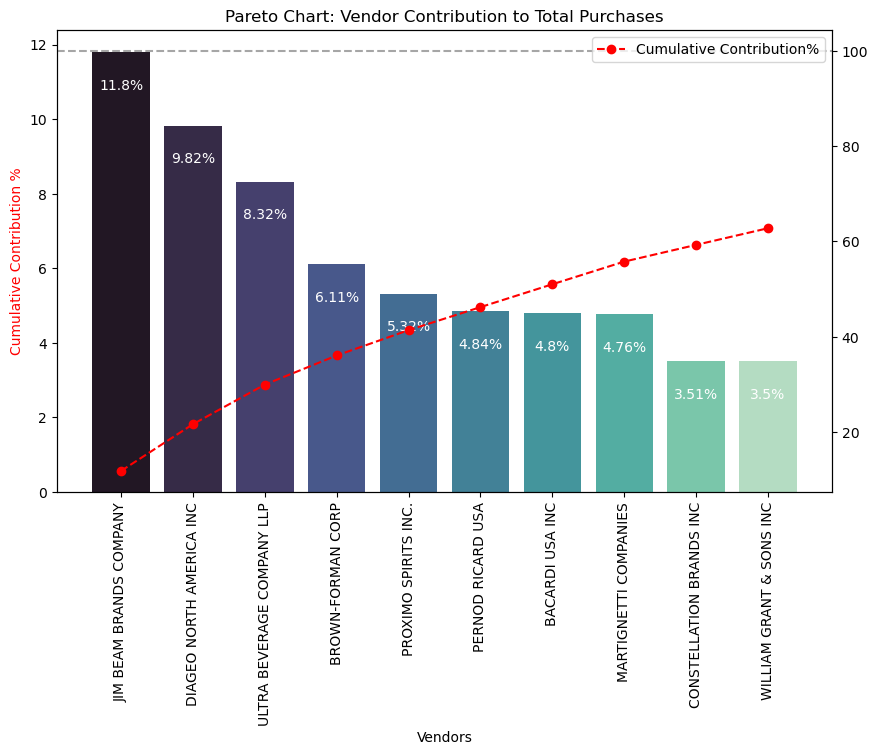

In [92]:
fig,ax1 = plt.subplots(figsize=(10,6))

## Bar Plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')

#Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax1.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='grey', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

**How much of total procurement is dependent on the top vendors?**

In [95]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 62.78 %


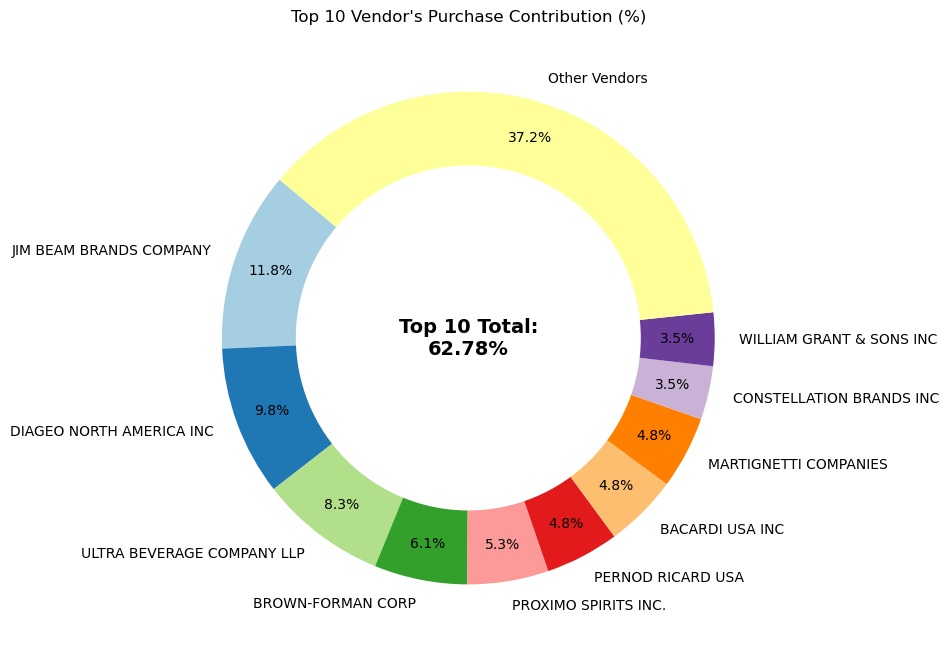

In [103]:
vendors = list(top_vendors['VendorName'].values)
PurchaseContributions= list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(PurchaseContributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
PurchaseContributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(PurchaseContributions, labels=vendors, autopct='%1.1f%%',
                                 startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a 'donut' effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

## Add total contribution annotation in the center
plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

**Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?**

In [106]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [108]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=["Small", "Medium", "Large"])

In [114]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [116]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


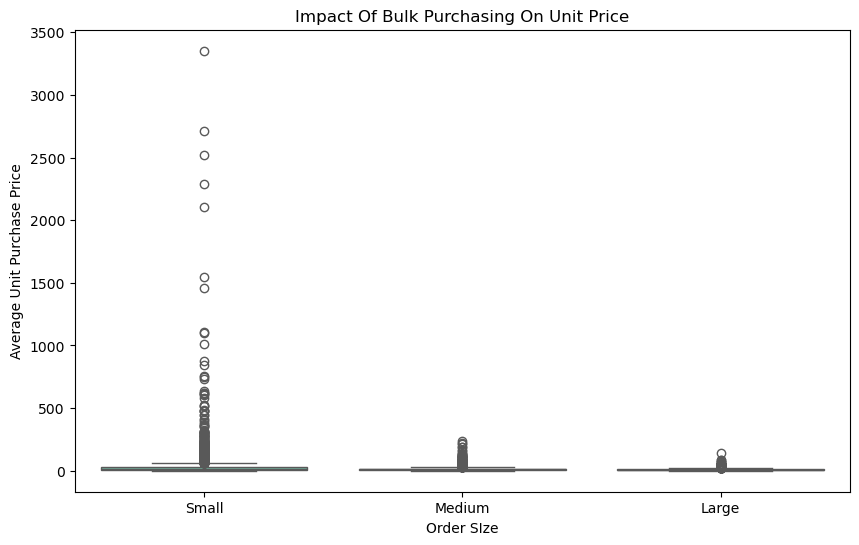

In [120]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice', palette="Set2")
plt.title("Impact Of Bulk Purchasing On Unit Price")
plt.xlabel("Order SIze")
plt.ylabel("Average Unit Purchase Price")
plt.show()

* Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
* The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit
revenue.

**Which vendors have low inventory turnover, indicating excess stock and slow-moving products?** 

In [130]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver', ascending=True).head(10)

,StockTurnOver
VendorName,
MANGO BOTTLING INC,0.695048
WALPOLE MTN VIEW WINERY,0.708333
BRONCO WINE COMPANY,0.731250
"PREMIUM PORT WINES, INC.",0.806543
FORTUNE WINE BROKERS LLC,0.812514
PREMIER DISTRIBUTORS,0.814248
BLACK ROCK SPIRITS LLC,0.816609
MILTONS DISTRIBUTING CO,0.832937
Circa Wines,0.833030


**How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?**

In [145]:
df['UnSoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df['UnSoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [147]:
print(df['UnSoldInventoryValue'].sum())


2708177.2199999997


In [149]:
# Aggregated Capital Loacked Per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnSoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Loacked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnSoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnSoldInventoryValue'] = inventory_value_per_vendor['UnSoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnSoldInventoryValue
47,JIM BEAM BRANDS COMPANY,877.71K
71,PERNOD RICARD USA,441.26K
63,MOET HENNESSY USA INC,407.01K
26,DIAGEO NORTH AMERICA INC,381.38K
13,BROWN-FORMAN CORP,363.75K
7,BACARDI USA INC,324.48K
118,WILLIAM GRANT & SONS INC,223.52K
77,PROXIMO SPIRITS INC.,194.40K
21,CONSTELLATION BRANDS INC,118.73K
80,REMY COINTREAU USA INC,116.52K


**What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.**

In [152]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [156]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [160]:
 low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [166]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1)/np.sqrt(len(data)) #standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64, Mean: 41.57


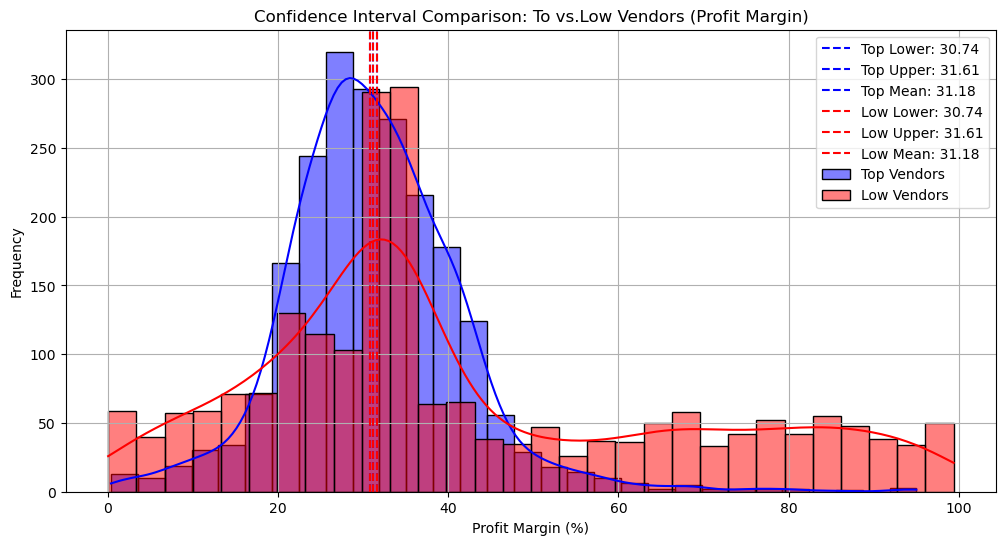

In [168]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}, Mean: {low_mean:.2f}")

plt.figure(figsize=(12,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color='blue', linestyle="--", label=f"Top Lower: {top_lower:.2f}" )
plt.axvline(top_upper, color='blue', linestyle="--", label=f"Top Upper: {top_upper:.2f}" )
plt.axvline(top_mean, color='blue', linestyle="--", label=f"Top Mean: {top_mean:.2f}" )

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(top_lower, color='red', linestyle="--", label=f"Low Lower: {top_lower:.2f}" )
plt.axvline(top_upper, color='red', linestyle="--", label=f"Low Upper: {top_upper:.2f}" )
plt.axvline(top_mean, color='red', linestyle="--", label=f"Low Mean: {top_mean:.2f}" )


# Finalize Plot
plt.title("Confidence Interval Comparison: To vs.Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

* The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
* This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
* For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
* For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved
distribution strategies.

**Is there a significant difference in profit Targins between top-performing and low-performing vendors?**
</br>Hypothesis:
* Ho (Null Hypothesis): There is no significant difference in the mean profit margins Of top-performing and low-performing vendors.
* H1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [174]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant diff in profit margins between top and low - performing vendors.")
else:
    print("Fail to reject h0: No Significant diffrence in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H0: There is a significant diff in profit margins between top and low - performing vendors.
